In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stat

In [ ]:
import json

df = pd.read_json("enem_2023.json")

In [ ]:
df.shape


(1000, 6)

In [ ]:
df.head(10)

,Linguagens,Ciências humanas,Ciências da natureza,Matemática,Redação,Sexo
0,585.669300,686.512178,390.482473,452.281333,546.371706,Homem
1,359.384608,642.084134,NaN,412.205207,741.825256,Mulher
2,622.732384,495.510719,443.183580,669.683401,684.515750,Homem
3,350.164605,602.041588,413.979810,676.608952,671.237114,Homem
4,384.093657,489.249140,609.758123,520.426698,744.375048,Homem
5,616.043360,502.007005,497.777935,615.902547,507.365147,Homem
6,511.897593,479.197660,469.023899,441.139103,541.979136,Mulher
7,377.439818,663.489624,556.239031,517.215575,635.424649,Mulher
8,597.462934,NaN,483.223740,509.043317,499.676936,Mulher
9,536.571398,594.007869,NaN,595.562778,270.839965,Mulher


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Linguagens            897 non-null    float64
 1   Ciências humanas      936 non-null    float64
 2   Ciências da natureza  824 non-null    float64
 3   Matemática            924 non-null    float64
 4   Redação               860 non-null    float64
 5   Sexo                  1000 non-null   object 
dtypes: float64(5), object(1)
memory usage: 87.0+ KB


In [ ]:
df.isna().sum()

,0
Linguagens,103
Ciências humanas,64
Ciências da natureza,176
Matemática,76
Redação,140
Sexo,0


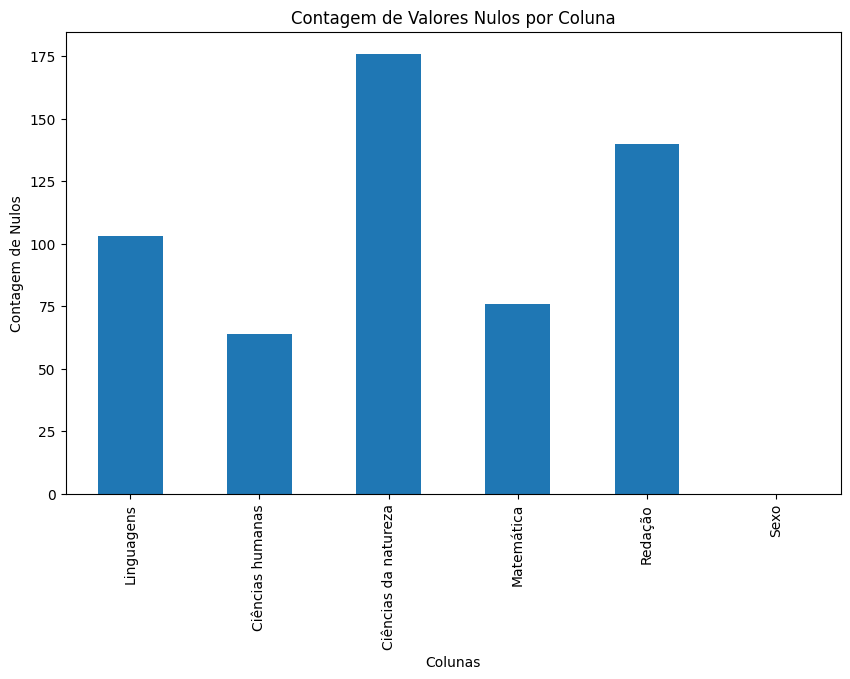

In [ ]:
plt.figure(figsize=(10, 6))
df.isnull().sum().plot(kind='bar')
plt.title('Contagem de Valores Nulos por Coluna')
plt.xlabel('Colunas')
plt.ylabel('Contagem de Nulos')
plt.show()

In [ ]:
df_numerico = df.select_dtypes(include='number')
coluna_maior_amplitude = (df_numerico.max() - df_numerico.min()).idxmax()
coluna_maior_amplitude

'Redação'

In [ ]:
df_sem_nulos = df.dropna()

In [ ]:
df_sem_nulos.isna().sum()

,0
Linguagens,0
Ciências humanas,0
Ciências da natureza,0
Matemática,0
Redação,0
Sexo,0


In [ ]:
df_sem_nulos.describe()

,Linguagens,Ciências humanas,Ciências da natureza,Matemática,Redação,max,min
count,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
mean,514.785029,525.781100,499.897423,534.606714,636.528753,658.921972,438.509427
std,0.368007,1.783578,0.822846,1.921841,1.774526,4.964272,0.797307
min,514.524809,524.519920,499.315583,533.247767,635.273973,655.411702,437.945646
25%,514.654919,525.150510,499.606503,533.927240,635.901363,657.166837,438.227537
50%,514.785029,525.781100,499.897423,534.606714,636.528753,658.921972,438.509427
75%,514.915140,526.411691,500.188343,535.286187,637.156142,660.677108,438.791318
max,515.045250,527.042281,500.479263,535.965660,637.783532,662.432243,439.073208


In [ ]:
df_numerico = df.select_dtypes(include='number')
df_sem_nulos = df_numerico.agg(['mean', 'median'])
df_sem_nulos


,Linguagens,Ciências humanas,Ciências da natureza,Matemática,Redação
mean,514.524809,527.042281,499.315583,535.965660,637.783532
median,515.045250,524.519920,500.479263,533.247767,635.273973


In [ ]:
df_sem_nulos['nota_ponderada'] = (df['Linguagens'] * 2) + \
                       (df['Ciências humanas'] * 4) + \
                       (df['Ciências da natureza'] * 2) + \
                       (df['Matemática'] * 1) + \
                       (df['Redação'] * 1)

df_ordenado = df.sort_values('nota_ponderada', ascending=False)

top_students = df_ordenado.head(500)


top_students

KeyError: 'nota_ponderada'

4. Se todos esses estudantes aplicassem para ciência da computação e
existem apenas 40 vagas, qual seria a variância e média da nota dos
estudantes que entraram no curso de ciência da computação?


In [ ]:

top_40 = df_ordenado.head(40)

media_top_40 = top_40['nota_ponderada'].mean()
variancia_top_40 = top_40['nota_ponderada'].var()
print(f"Média: {media_top_40}")
print(f"Variancia: {variancia_top_40}")

Média: 6141.639040059803
Variancia: 21531.18555812758


5. Qual o valor do teto do terceiro quartil para as disciplinas de matemática
e linguagens?

In [ ]:
q3_matematica = df_sem_nulos['Matemática'].quantile(0.75)
q3_linguagens = df_sem_nulos['Linguagens'].quantile(0.75)

print(f"Teto Q3 Matemática: {(q3_matematica)}")
print(f"Teto Q3 Linguagens: {(q3_linguagens)}")


Teto Q3 Matemática: 535.2861868142796
Teto Q3 Linguagens: 514.9151396250584


6. Faça o histograma de Redação e Linguagens, de 20 em 20 pontos.
Podemos dizer que são histogramas simétricos, justifique e classifique se
não assimétricas?



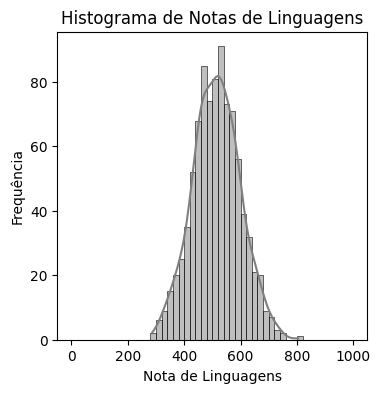

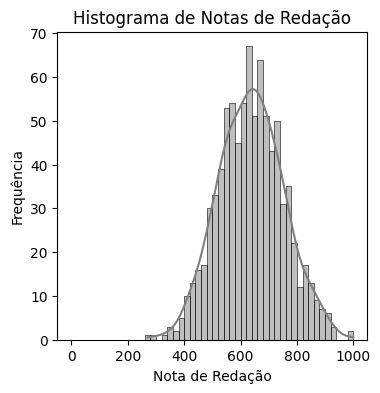

In [ ]:
# Histograma de Linguagens
plt.figure(figsize=(4, 4))
sns.histplot(df['Linguagens'].dropna(), bins=range(0, 1001, 20), kde=True, color='gray')
plt.title('Histograma de Notas de Linguagens')
plt.xlabel('Nota de Linguagens')
plt.ylabel('Frequência')
plt.show()

# Histograma de Redação
plt.figure(figsize=(4, 4))
sns.histplot(df['Redação'].dropna(), bins=range(0, 1001, 20), kde=True, color='gray')
plt.title('Histograma de Notas de Redação')
plt.xlabel('Nota de Redação')
plt.ylabel('Frequência')
plt.show()



In [ ]:
assimetria_linguagens = df['Linguagens'].skew()
assimetria_redacao = df['Redação'].skew()

print(f"Assimetria de Linguagens: {assimetria_linguagens:.2f} - simétrico")
print(f"Assimetria de Redação: {assimetria_redacao:.2f} - simétrico")

Assimetria de Linguagens: 0.08 - simétrico
Assimetria de Redação: 0.07 - simétrico


7. Agora coloque um range fixo de 0 até 1000, você ainda tem a mesma
opinião quanto a simetria?

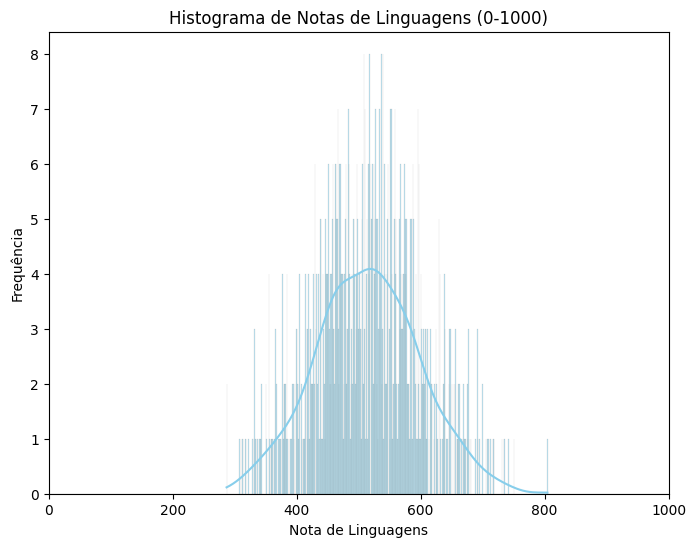

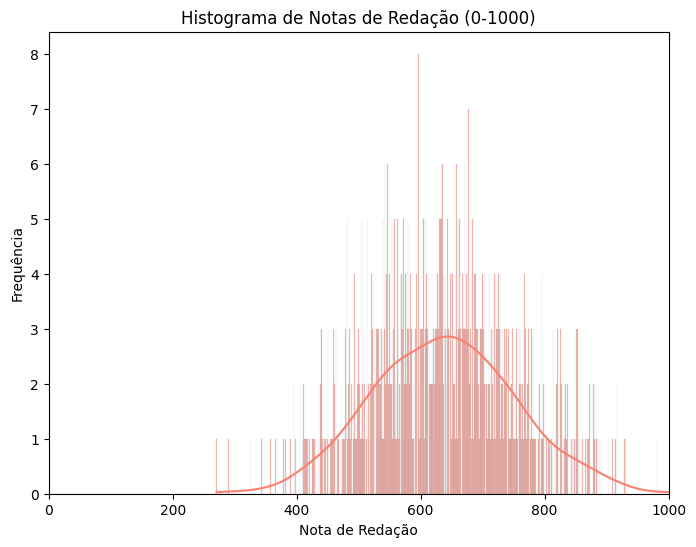

In [ ]:
# Histograma de Linguagens com range fixo de 0 a 1000
plt.figure(figsize=(8, 6))
sns.histplot(df['Linguagens'].dropna(), bins=range(0, 1000), kde=True, color='skyblue')
plt.title('Histograma de Notas de Linguagens (0-1000)')
plt.xlabel('Nota de Linguagens')
plt.ylabel('Frequência')
plt.xlim(0, 1000)
plt.show()

# Histograma de Redação com range fixo de 0 a 1000
plt.figure(figsize=(8, 6))
sns.histplot(df['Redação'].dropna(), bins=range(0, 1000), kde=True, color='salmon')
plt.title('Histograma de Notas de Redação (0-1000)')
plt.xlabel('Nota de Redação')
plt.ylabel('Frequência')
plt.xlim(0, 1000)
plt.show()


8. Faça um boxplot para as notas de Ciências da Natureza e Redação,
analisando os quartis e identificando possíveis outliers. Utilize o método
IQR (Intervalo Interquartílico) para essa análise.

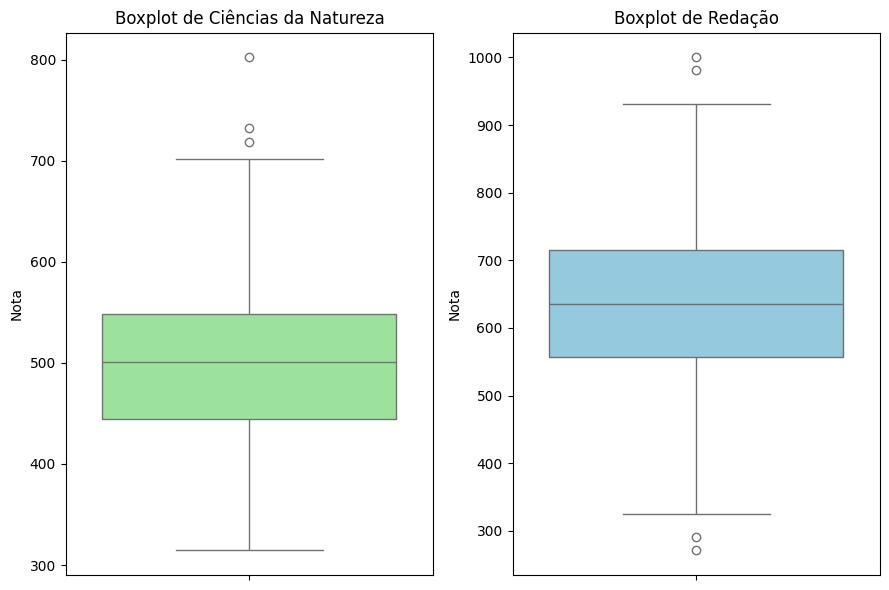

In [ ]:
plt.figure(figsize=(9, 6))

plt.subplot(1, 2, 1)
sns.boxplot(y=df['Ciências da natureza'], color='lightgreen')
plt.title('Boxplot de Ciências da Natureza')
plt.ylabel('Nota')



plt.subplot(1, 2, 2)
sns.boxplot(y=df['Redação'], color='skyblue')
plt.title('Boxplot de Redação')
plt.ylabel('Nota')

plt.tight_layout()
plt.show()


9. Remova todos os outliers e verifique se eles são passíveis de alterar a
média nacional significativamente? (considere significativamente um valor
acima de 5%)

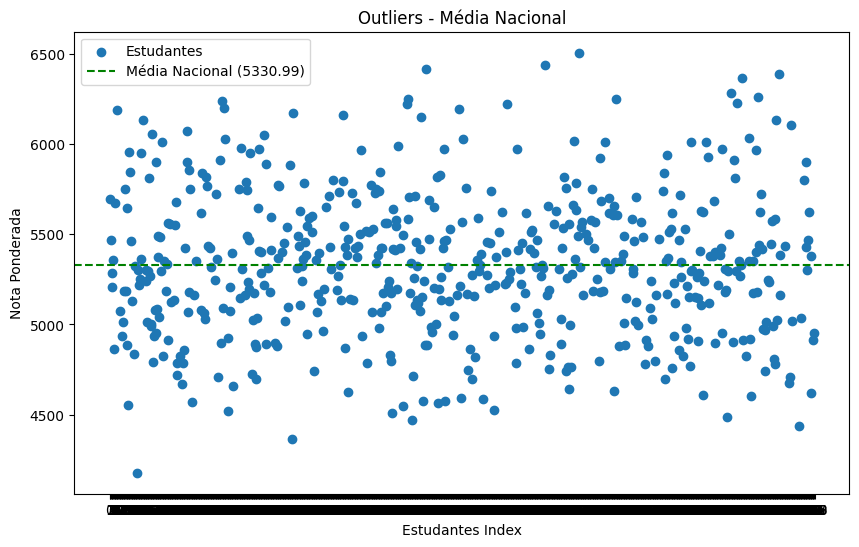

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df.index, df['nota_ponderada'], label='Estudantes')

plt.axhline(y=media_nacional, color='green', linestyle='--', label=f'Média Nacional ({media_nacional:.2f})')

plt.xlabel('Estudantes Index')
plt.ylabel('Nota Ponderada')
plt.title('Outliers - Média Nacional')
plt.legend()
plt.show()


In [ ]:


def count_outliers_zscore(df, threshold=3):

  outlier_counts = {}
  for col in df.select_dtypes(include=['number']).columns:
    z_scores = np.abs(stat.zscore(df[col].dropna()))
    outlier_counts[col] = (z_scores > threshold).sum()
  return outlier_counts

outliers = count_outliers_zscore(df)
outliers


{'Linguagens': 1,
 'Ciências humanas': 3,
 'Ciências da natureza': 1,
 'Matemática': 2,
 'Redação': 3,
 'nota_ponderada': 0}